In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from solver import CaptioningSolver
from model import CaptionGenerator
from coco_utils import load_coco_data, decode_captions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
small_data = load_coco_data('small_data.pkl')
word_to_idx = small_data['word_to_idx']

train_image_filename <type 'numpy.ndarray'> (82783,) <U31
idx_to_word <type 'dict'> 1259
train_captions <type 'numpy.ndarray'> (100, 17) int32
train_image_idxs <type 'numpy.ndarray'> (100,) int32
train_features <type 'numpy.ndarray'> (100, 196, 512) float64
word_to_idx <type 'dict'> 1259


In [3]:
model = CaptionGenerator(word_to_idx, batch_size= 10, dim_feature=[196, 512], dim_embed=128,
                                   dim_hidden=128, n_time_step=16, cell_type='lstm', dtype=tf.float32)

In [4]:
solver = CaptioningSolver(model, small_data, n_epochs=100, batch_size=10, update_rule='adam',
                                      learning_rate=0.004, print_every=10, save_every=10000,
                                pretrained_model=None, model_path='./model/', test_model='./model/model-200')

In [5]:
#decode_captions(small_data['train_captions'], small_data['idx_to_word'])[10:70]

num epochs: 100
iterations per epoch: 10
data size: 100
batch size: 10

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Initial Train Loss: 762.07111
Generated Caption: nintendo in in in in in hangs hangs hangs hangs hangs hangs hangs hangs hangs hangs
Generated Caption: broken do do do do do do do do rice do do do do do do
Generated Caption: ducks pointing sign sign sign sign sign sign before before before sign sign sign sign sign
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train Loss at Epoch 10: 263.01651
Generated Caption: a kitchen the a kitchen <END>
Generated Caption: a kitchen kitchen kitchen a kitchen <END>
Generated Caption: a woman cooking cooking cooking kitchen cooking cooking cooking a kitchen <END>
*-*-*-*-*-*-*-*-*-*-*-*-*

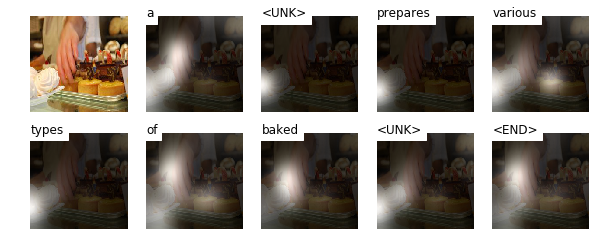

Sampled Caption: a red table topped with four white place <UNK> <END>


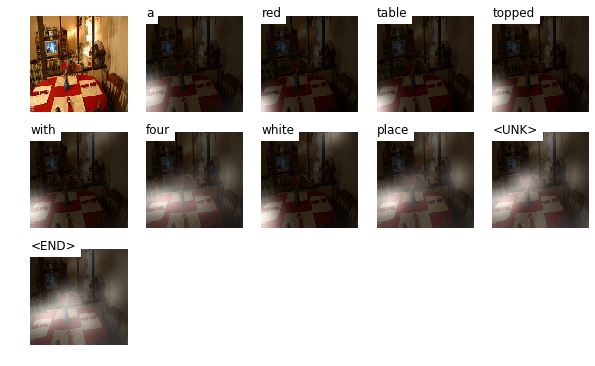

Sampled Caption: a man with a ball cap and an <UNK> using a brick oven  <END>


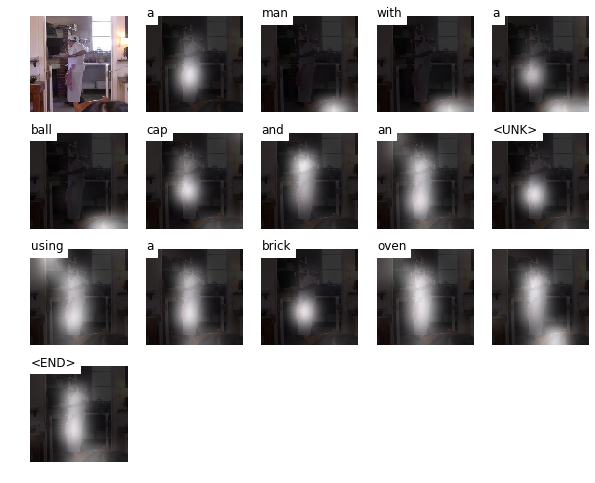

Sampled Caption: a man <UNK> vegetables on a white board <END>


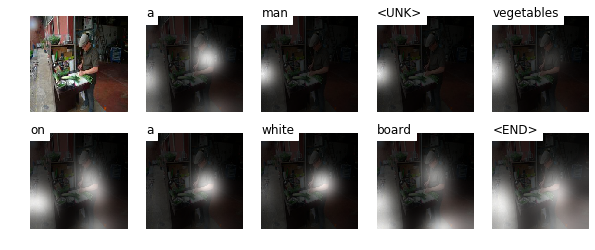

Sampled Caption: a kitchen with a table and some chairs  <END>


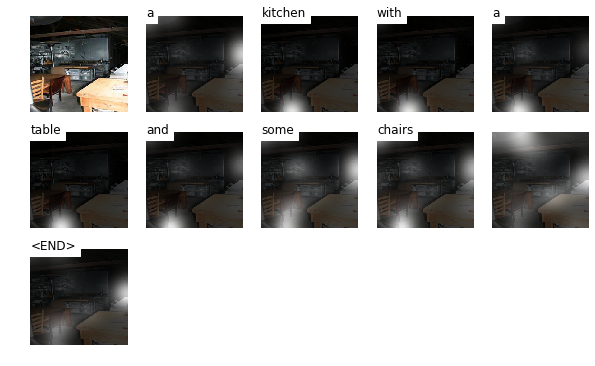

Sampled Caption: a long table with a plant on top of it surrounded with wooden chairs  <END>


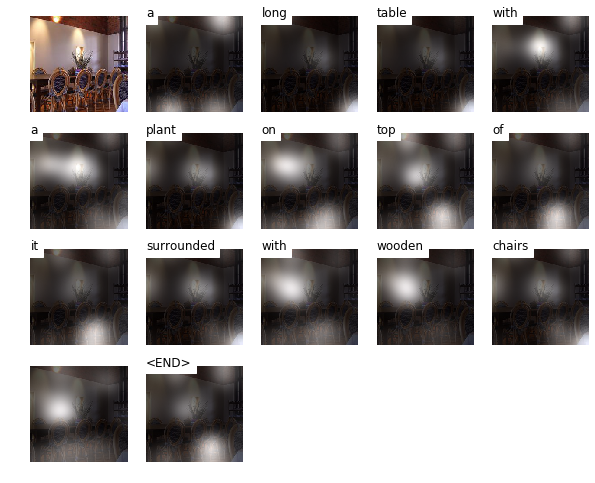

Sampled Caption: a man cutting meat on a cutting board <END>


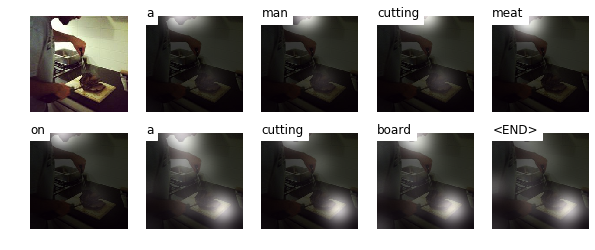

Sampled Caption: a <UNK> bus moving down the street as people stand waiting <END>


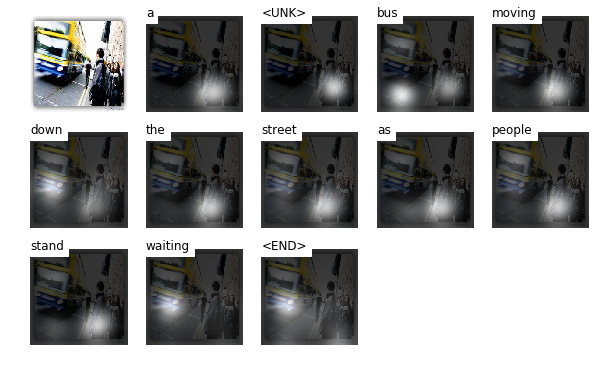

Sampled Caption: two people in a food truck one looking at an <UNK> <END>


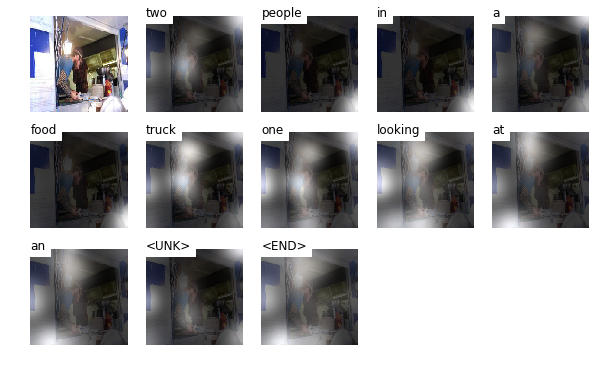

Sampled Caption: a kitchen with a table and some chairs  <END>


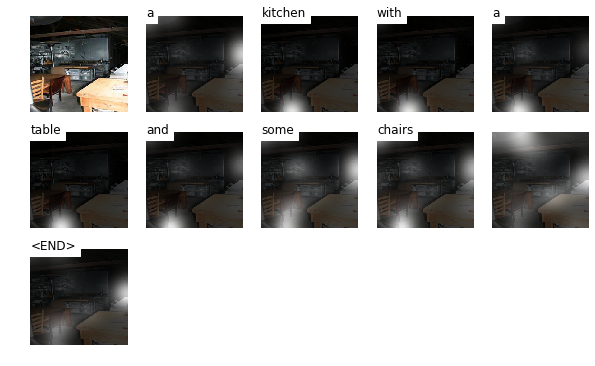

In [12]:
solver.train()

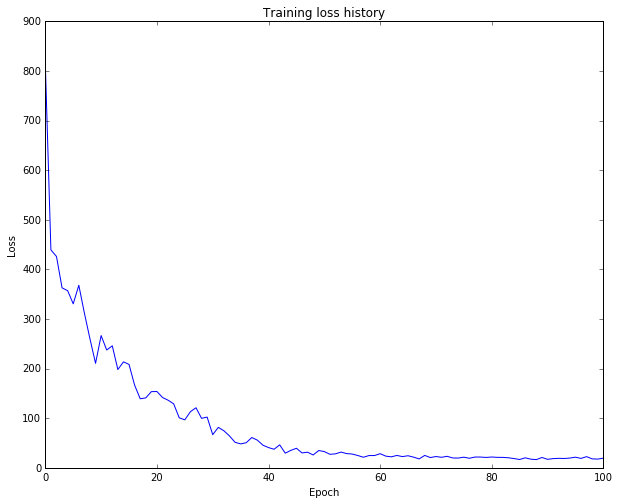

In [7]:
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()